In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from weatherkey import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


# Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})     

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | san rafael
Processing Record 4 of Set 1 | mullaitivu
City not found. Skipping...
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | dunmore town
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | voskresenskoye
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | matagami
Processing Record 17 of Set 1 | bondoukou
Processing Record 18 of Set 1 | meaford
Processing Record 19 of Set 1 | la maddalena
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | attawapiskat
City not found. Skipping...
Processin

Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | cayenne
Processing Record 39 of Set 4 | tuktoyaktuk
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | shingu
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | cesme
Processing Record 45 of Set 4 | urumqi
Processing Record 46 of Set 4 | ardesen
Processing Record 47 of Set 4 | sheltozero
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | maragogi
Processing Record 0 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | neiafu
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | weinan
Processing Record 5 of Set 5 | is
City not found. Skipping...
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | 

Processing Record 25 of Set 8 | minna
Processing Record 26 of Set 8 | san patricio
Processing Record 27 of Set 8 | ahipara
Processing Record 28 of Set 8 | college
Processing Record 29 of Set 8 | griffith
Processing Record 30 of Set 8 | manoharpur
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | pinas
Processing Record 33 of Set 8 | krasnyy yar
Processing Record 34 of Set 8 | huilong
Processing Record 35 of Set 8 | marsa matruh
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | atbasar
Processing Record 38 of Set 8 | korla
Processing Record 39 of Set 8 | la reforma
Processing Record 40 of Set 8 | karratha
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | emporia
Processing Record 43 of Set 8 | yirol
City not found. Skipping...
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | sangar
Processing Record 46 of Set 8 | yamada
Processing Record 47 of Set 8 | kharp
Processing Record 48 of Set 8 | daru


Processing Record 13 of Set 12 | roald
Processing Record 14 of Set 12 | pombas
Processing Record 15 of Set 12 | tongchuan
Processing Record 16 of Set 12 | boa vista
Processing Record 17 of Set 12 | xadani
City not found. Skipping...
Processing Record 18 of Set 12 | netanya
Processing Record 19 of Set 12 | vangaindrano
Processing Record 20 of Set 12 | el alto
Processing Record 21 of Set 12 | vagay
Processing Record 22 of Set 12 | rorvik
Processing Record 23 of Set 12 | calvinia
Processing Record 24 of Set 12 | ajdabiya
Processing Record 25 of Set 12 | panjakent
Processing Record 26 of Set 12 | winnemucca
Processing Record 27 of Set 12 | turukhansk
Processing Record 28 of Set 12 | santa clarita
Processing Record 29 of Set 12 | dawei
Processing Record 30 of Set 12 | port hedland
Processing Record 31 of Set 12 | omboue
Processing Record 32 of Set 12 | bowen
Processing Record 33 of Set 12 | tefe
Processing Record 34 of Set 12 | fayetteville
Processing Record 35 of Set 12 | maridi
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-20.4081,57.7000,26.25,65,40,4.63,MU,1667886635
1,nome,64.5011,-165.4064,3.04,100,100,9.26,US,1667886635
2,san rafael,-34.6177,-68.3301,22.33,35,100,4.17,AR,1667886636
3,lagoa,39.0500,-27.9833,17.20,71,100,7.68,PT,1667886636
4,dunmore town,25.5000,-76.6500,26.30,73,70,12.61,BS,1667886637


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("outputdata/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("outputdata/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahebourg,-20.4081,57.7000,26.25,65,40,4.63,MU,1667886635
1,nome,64.5011,-165.4064,3.04,100,100,9.26,US,1667886635
2,san rafael,-34.6177,-68.3301,22.33,35,100,4.17,AR,1667886636
3,lagoa,39.0500,-27.9833,17.20,71,100,7.68,PT,1667886636
4,dunmore town,25.5000,-76.6500,26.30,73,70,12.61,BS,1667886637


# Create Scatter plots requested

In [8]:
# Setting Variables for plotting
latinfo = city_data_df["Lat"]
maxtempinfo = city_data_df["Max Temp"]
huminfo = city_data_df["Humidity"]
cloudinfo = city_data_df["Cloudiness"]
windspeedinfo = city_data_df["Wind Speed"]

 Latitude vs Temperature

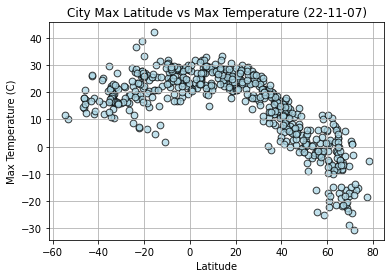

In [9]:
# Build the scatter plot for Latitude vs Temperature
plt.scatter(latinfo, maxtempinfo, marker="o", facecolors="lightblue", edgecolors="black", s=45, alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Max Temperature ({datetime.now():%y-%m-%d})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("outputdata/LatvsTemp.png")

# Show plot
plt.show()

Latitude vs Humidity

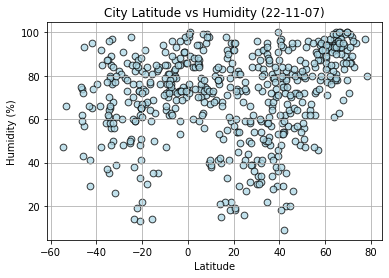

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(latinfo, huminfo, marker="o", facecolors="lightblue", edgecolors="black", s=45, alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datetime.now():%y-%m-%d})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set a grid on the plot
plt.grid()

# Save the figure
plt.savefig("outputdata/LatvsHumidity.png")

# Show plot
plt.show()

Latitude vs Cloudiness

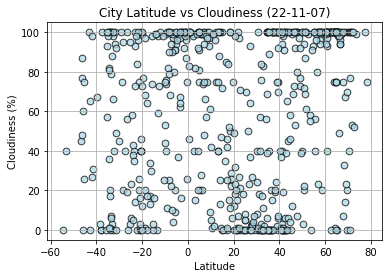

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latinfo, cloudinfo, marker="o", facecolors="lightblue", edgecolors="black", s=45, alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datetime.now():%y-%m-%d})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set a grid on the plot
plt.grid()

# Save the figure
plt.savefig("outputdata/LatvsCloudiness.png")

# Show plot
plt.show()

Latitude vs Wind Speed

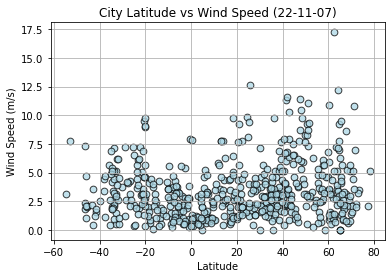

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latinfo, windspeedinfo, marker="o", facecolors="lightblue", edgecolors="black", s=45, alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({datetime.now():%y-%m-%d})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set a grid on the plot
plt.grid()

# Save the figure
plt.savefig("outputdata/LatvsWindSpeed.png")

# Show plot
plt.show()

# Compute linear regression for each relationship

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nome,64.5011,-165.4064,3.04,100,100,9.26,US,1667886635
3,lagoa,39.0500,-27.9833,17.20,71,100,7.68,PT,1667886636
4,dunmore town,25.5000,-76.6500,26.30,73,70,12.61,BS,1667886637
5,albany,42.6001,-73.9662,7.98,62,6,2.24,US,1667886637
6,saskylakh,71.9167,114.0833,-30.52,98,53,2.28,RU,1667886637


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahebourg,-20.4081,57.7000,26.25,65,40,4.63,MU,1667886635
2,san rafael,-34.6177,-68.3301,22.33,35,100,4.17,AR,1667886636
7,cape town,-33.9258,18.4232,18.40,80,20,2.06,ZA,1667886421
10,rikitea,-23.1203,-134.9692,23.49,89,93,6.07,PF,1667886639
11,bengkulu,-3.8004,102.2655,27.76,73,99,2.95,ID,1667886639


# Temperature vs Latitude Linear Regression plot

In [15]:
# Linear regression on Northern Hemisphere
x_valuesnorth = northern_hemi_df['Lat']
y_valuesnorth = northern_hemi_df['Max Temp']
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuesnorth, y_valuesnorth)

# Get regression values
regress_values_north = x_valuesnorth * slope + intercept
print(regress_values_north)

City_ID
1      -5.349942
3      10.441610
4      18.848930
5       8.238892
6      -9.951073
         ...    
557    -0.859503
558    26.302096
559     0.410964
560    31.931588
562    32.029684
Name: Lat, Length: 379, dtype: float64


In [16]:
line_eqnh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eqnh)

y = -0.62x +34.67


The r-value is: 0.7762533981501916


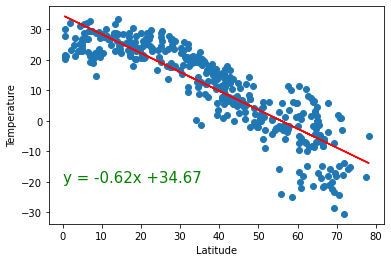

In [17]:
# Create Plot
plt.scatter(x_valuesnorth,y_valuesnorth)
plt.plot(x_valuesnorth,regress_values_north,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eqnh,(0,-20),fontsize=15,color="green")

# Save Figure
plt.savefig("outputdata/NorthLatvsTempLinReg.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [18]:
# Linear regression on Southern Hemisphere
x_valuessouth = southern_hemi_df['Lat']
y_valuessouth = southern_hemi_df['Max Temp']
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valuessouth, y_valuessouth)

# Get regression values
regress_values_south = x_valuessouth * slope + intercept
print(regress_values_south)

City_ID
0      21.860697
2      18.767532
7      18.918146
10     21.270302
11     25.475884
         ...    
542    19.417724
546    21.789907
554    17.621309
556    17.288496
561    23.234767
Name: Lat, Length: 184, dtype: float64


In [19]:
line_eqsh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eqsh)

y = 0.22x +26.3


The r-value is: 0.20523406165260516


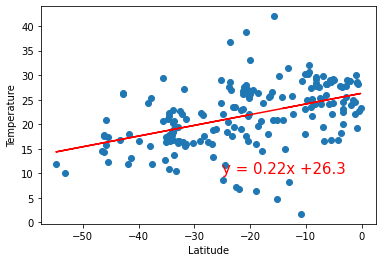

In [20]:
# Create Plot
plt.scatter(x_valuessouth,y_valuessouth)
plt.plot(x_valuessouth,regress_values_south,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eqsh,(-25,10),fontsize=15,color="red")

# Save Figure
plt.savefig("outputdata/SouthLatvsTempLinReg.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Humidity vs. Latitude Linear Regression Plot

In [21]:
# Linear regression on Northern Hemisphere
x_valnorthhum = northern_hemi_df['Lat']
y_valnorthhum = northern_hemi_df['Humidity']
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valnorthhum, y_valnorthhum)

# Get regression values
regress_values_northhum = x_valnorthhum * slope + intercept
print(regress_values_northhum)

City_ID
1      80.447053
3      72.413635
4      68.136696
5      73.534193
6      82.787722
         ...    
557    78.162694
558    64.345150
559    77.516387
560    61.481337
562    61.431434
Name: Lat, Length: 379, dtype: float64


In [22]:
line_eqnhl = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eqnhl)

y = 0.32x +60.09


The r-value is: 0.09127913273305792


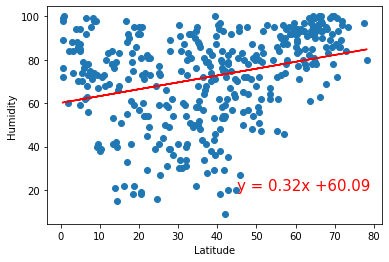

In [23]:
# Create Plot
plt.scatter(x_valnorthhum,y_valnorthhum)
plt.plot(x_valnorthhum,regress_values_northhum,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eqnhl,(45,20),fontsize=15,color="red")

# Save Figure
plt.savefig("outputdata/NorthLatvsHumidityLinReg.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [24]:
# Linear regression on Southern Hemisphere
x_valsouthhum = southern_hemi_df['Lat']
y_valsouthhum = southern_hemi_df['Humidity']
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valsouthhum, y_valsouthhum)

# Get regression values
regress_values_southhum = x_valsouthhum * slope + intercept
print(regress_values_southhum)

City_ID
0      69.696843
2      65.189311
7      65.408794
10     68.836486
11     74.965093
         ...    
542    66.136808
546    69.593683
554    63.518972
556    63.033978
561    71.699213
Name: Lat, Length: 184, dtype: float64


In [25]:
line_eqshl = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eqshl)

y = 0.32x +76.17


The r-value is: 0.055890541211303026


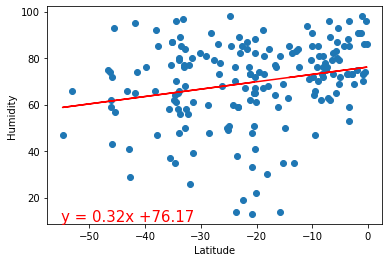

In [26]:
# Southern Hemisphere
# Create Plot
plt.scatter(x_valsouthhum,y_valsouthhum)
plt.plot(x_valsouthhum,regress_values_southhum,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eqshl,(-55,10),fontsize=15,color="red")

# Save Figure
plt.savefig("outputdata/SouthLatvsHumidityLinReg.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Cloudiness vs. Latitude Linear Regression Plot

In [27]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_valnorthcld = northern_hemi_df['Lat']
y_valnorthcld = northern_hemi_df['Cloudiness']
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valnorthcld, y_valnorthcld)

# Get regression values
regress_values_northcld = x_valnorthcld * slope + intercept
print(regress_values_northcld)

City_ID
1      70.901760
3      59.162624
4      52.912785
5      60.800082
6      74.322152
         ...    
557    67.563654
558    47.372245
559    66.619213
560    43.187389
562    43.114467
Name: Lat, Length: 379, dtype: float64


In [28]:
line_eqnc = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eqnc)

y = 0.46x +41.15


The r-value is: 0.05298009925047158


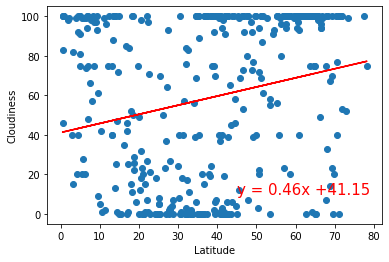

In [29]:
# Create Plot
plt.scatter(x_valnorthcld,y_valnorthcld)
plt.plot(x_valnorthcld,regress_values_northcld,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eqnc,(45,10),fontsize=15,color="red")

# Save Figure
plt.savefig("outputdata/NorthLatvsCloudinessLinReg.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [30]:
# Southern Hemisphere
# # Linear regression on Northern Hemisphere
x_valsouthcld = southern_hemi_df['Lat']
y_valsouthcld = southern_hemi_df['Cloudiness']
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valsouthcld, y_valsouthcld)

# Get regression values
regress_values_southcld = x_valsouthcld * slope + intercept
print(regress_values_southcld)

City_ID
0      58.542381
2      48.308476
7      48.806790
10     56.589026
11     70.503423
         ...    
542    50.459673
546    58.308169
554    44.516135
556    43.415005
561    63.088567
Name: Lat, Length: 184, dtype: float64


In [31]:
line_eqsc = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eqsc)

y = 0.72x +73.24


The r-value is: 0.06389748760034465


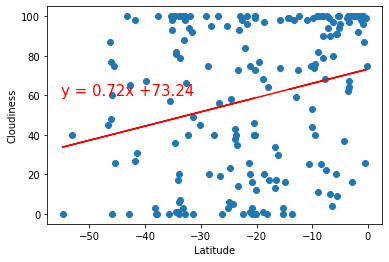

In [32]:
# Create Plot
plt.scatter(x_valsouthcld,y_valsouthcld)
plt.plot(x_valsouthcld,regress_values_southcld,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eqsc,(-55,60),fontsize=15,color="red")

# Save Figure
plt.savefig("outputdata/SouthLatvsCloudinessLinReg.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Windspeed vs Latitude Linear Regression Plot

In [33]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_valnorthspd = northern_hemi_df['Lat']
y_valnorthspd = northern_hemi_df['Wind Speed']
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valnorthspd, y_valnorthspd)

# Get regression values
regress_values_northspd = x_valnorthspd * slope + intercept
print(regress_values_northspd)

City_ID
1      4.227637
3      3.630178
4      3.312094
5      3.713516
6      4.401717
         ...   
557    4.057745
558    3.030110
559    4.009678
560    2.817123
562    2.813412
Name: Lat, Length: 379, dtype: float64


In [34]:
line_eqnw = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eqnw)

y = 0.02x +2.71


The r-value is: 0.032498030153778244


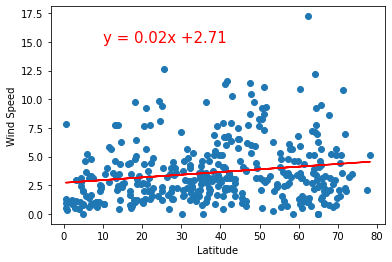

In [35]:
# Create Plot
plt.scatter(x_valnorthspd,y_valnorthspd)
plt.plot(x_valnorthspd,regress_values_northspd,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eqnw,(10,15),fontsize=15,color="red")

# Save Figure
plt.savefig("outputdata/NorthLatvsWindSpeedLinReg.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [36]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_valsouthspd = southern_hemi_df['Lat']
y_valsouthspd = southern_hemi_df['Wind Speed']
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_valsouthspd, y_valsouthspd)

# Get regression values
regress_values_southspd = x_valsouthspd * slope + intercept
print(regress_values_southspd)

City_ID
0      3.036505
2      3.431152
7      3.411935
10     3.111832
11     2.575255
         ...   
542    3.348196
546    3.045537
554    3.577395
556    3.619857
561    2.861192
Name: Lat, Length: 184, dtype: float64


In [37]:
line_eqsw = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eqsw)

y = -0.03x +2.47


The r-value is: 0.033293516751140166


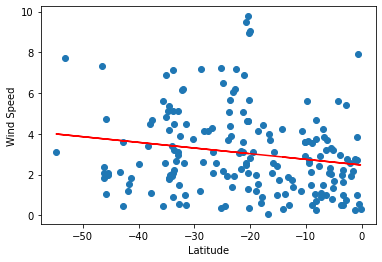

In [38]:
# Create Plot
plt.scatter(x_valsouthspd,y_valsouthspd)
plt.plot(x_valsouthspd,regress_values_southspd,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eqsw,(-25,11),fontsize=15,color="red")

# Save Figure
plt.savefig("outputdata/SouthLatvsWindSpeedLinReg.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()